In [18]:
import os
import pandas as pd

dataset_file = "./dataset/data_unit.csv"
df_loaddata = pd.read_csv(dataset_file)

print(df_loaddata.columns)

Index(['SMILES_rdkit_final', 'logP', 'Fup', 'Clint.invitro.[ml/min/10^6cell]',
       'Clint.invitro.[ml/min/kg]', 'Clint.invivo.', 'MW_rdkit', 'HBD_rdkit',
       'HBA_rdkit', 'NRB_rdkit', 'RF_rdkit', 'PSA_rdkit', 'logP_rdkit'],
      dtype='object')


In [19]:
## --  make train/Test data Using Invivo -- ##
df_train = df_loaddata.dropna(subset=['Clint.invitro.'], axis=0)
df_train = df_train.drop(df_train[df_train['Clint.invivo.'].notna()].index)

df_test = df_loaddata[df_loaddata['Clint.invivo.'].notna()]

df_train = df_train.drop("Clint.invivo.", axis=1).reset_index(drop=True)
df_test = df_test.drop("Clint.invitro.", axis=1).reset_index(drop=True)

df_train.rename(columns = {'SMILES_rdkit_final':'SMILES', "Clint.invitro.":"Clint"},inplace=True)
df_test.rename(columns = {'SMILES_rdkit_final':'SMILES', "Clint.invivo.":"Clint"},inplace=True)

save_path = "./dataset/fin/newdata"
if not os.path.exists(save_path):
    os.makedirs(save_path)

df_train.to_csv(f"{save_path}/train.csv", index=False)
df_test.to_csv(f"{save_path}/test.csv", index=False)

KeyError: ['Clint.invitro.']

In [ ]:
## --  make train/Test data Using Invivo -- ##
df_train = df_loaddata.dropna(subset=['Clint.invitro.'], axis=0)
df_train = df_train.drop(df_train[df_train['Clint.invivo.'].notna()].index)

df_test = df_loaddata[df_loaddata['Clint.invivo.'].notna()]

df_train = df_train.drop("Clint.invivo.", axis=1).reset_index(drop=True)
df_test = df_test.drop("Clint.invitro.", axis=1).reset_index(drop=True)

df_train.rename(columns = {'SMILES_rdkit_final':'SMILES', "Clint.invitro.":"Clint"},inplace=True)
df_test.rename(columns = {'SMILES_rdkit_final':'SMILES', "Clint.invivo.":"Clint"},inplace=True)

save_path = "./dataset/fin/newdata_sort"
if not os.path.exists(save_path):
    os.makedirs(save_path)

# remove clearance value is 0
print(sum(df_train['Clint'] != 0 ), sum(df_train['Clint'] == 0 ))
print(len(df_train))

df_sorted = df_train[df_train["Clint"] != 0]
print(len(df_sorted))

if sum(df_train['Clint'] != 0 ) == len(df_sorted):
    df_train.to_csv(f"{save_path}/train.csv", index=False)
    print("save train data!")

df_test.to_csv(f"{save_path}/test.csv", index=False)

2563 320
2883
2563
save train data!


In [ ]:
## --  make train data not Using Invivo -- ##
df_train = df_loaddata.dropna(subset=['Clint.invitro.[ml/min/kg]'], axis=0)
df_train = df_train.drop(["Clint.invivo.", "Clint.invitro.[ml/min/10^6cell]"], axis=1).reset_index(drop=True)
df_train.rename(columns = {'SMILES_rdkit_final':'SMILES', "Clint.invitro.[ml/min/kg]":"Clint"},inplace=True)

save_path = "./dataset/fin/newdata_nonvivo_sort"
if not os.path.exists(save_path):
            os.makedirs(save_path)

print(sum(df_train['Clint'] != 0 ), sum(df_train['Clint'] == 0 ))
print(len(df_train))

df_sorted = df_train[df_train["Clint"] != 0]
print(len(df_sorted))

if sum(df_train['Clint'] != 0 ) == len(df_sorted):
    df_train.to_csv(f"{save_path}/train.csv", index=False)
    print("save train data!")


2718 0
2718
2718
save train data!


In [28]:
import pandas as pd

result_mlp, result_encoder = './results/1_config_sweep/_lasttest/', './results/1_config_sweep_EncoderDecoder/'
file_name = 'result_metrics.csv'
df_mlpResult, df_encoderResult = pd.read_csv(result_mlp + file_name), pd.read_csv(result_encoder + file_name)

## -- data preprecessing -- ##
df_mlpResult = df_mlpResult[(df_mlpResult['seed'] != 241) & (df_mlpResult['seed'] != 510)]
mlp_result = df_mlpResult.groupby('feature_type').agg({
    'test_rm2': ['mean', 'std'],
    'test_r2': ['mean', 'std'],
    'test_CI': ['mean', 'std']
}).reset_index()

# 컬럼명 재정의
mlp_result.columns = ['feature_type', 'aver_rm2', 'std_rm2', 'aver_r2', 'std_r2', 'aver_CI', 'std_CI']

## -- data preprecessing -- ##
df_encoderResult = df_encoderResult[(df_encoderResult['seed'] != 241) & (df_encoderResult['seed'] != 510)]
df_encoderResult = df_encoderResult[df_encoderResult['model_type'] == 'encoder']
Encoder_result = df_encoderResult.groupby('feature_type').agg({
    'test_rm2': ['mean', 'std'],
    'test_r2': ['mean', 'std'],
    'test_CI': ['mean', 'std']
}).reset_index()

# 컬럼명 재정의
Encoder_result.columns = ['feature_type', 'aver_rm2', 'std_rm2', 'aver_r2', 'std_r2', 'aver_CI', 'std_CI']

In [29]:
print(mlp_result)
print(Encoder_result)

  feature_type  aver_rm2   std_rm2   aver_r2    std_r2   aver_CI    std_CI
0          all  0.246997  0.092692  0.221073  0.106953  0.683433  0.045857
1      default  0.227987  0.070856  0.205660  0.104893  0.662823  0.036245
2     features  0.250503  0.079184  0.236447  0.087901  0.674030  0.054637
3        rdkit  0.217173  0.062286  0.171180  0.047646  0.656763  0.048871
  feature_type  aver_rm2   std_rm2   aver_r2    std_r2  aver_CI    std_CI
0          all  0.222127  0.040275  0.142230  0.087213  0.67511  0.025965
1      default  0.225127  0.054101  0.151103  0.042874  0.68197  0.037797
2     features  0.230823  0.034859  0.164720  0.037338  0.69152  0.014352
3        rdkit  0.164380  0.084778  0.092350  0.112020  0.65813  0.072276


In [32]:
import pandas as pd

result_path = './results/1_config_augment_sweep_batch_test/'
file_name = 'result_metrics.csv'
df_encoderResult = pd.read_csv(result_path + file_name)

## -- data preprecessing -- ##
# df_encoderResult = df_encoderResult
df_encoderResult = df_encoderResult[(df_encoderResult['seed'] == 3745) | (df_encoderResult['seed'] == 2334)]
df_NonResult = df_encoderResult[df_encoderResult['data_augmentation'] == False]
Non_aug_result = df_NonResult.groupby('feature_type').agg({
    'test_rm2': ['mean', 'std'],
    'test_r2': ['mean', 'std'],
    'test_CI': ['mean', 'std']
}).reset_index()

# 컬럼명 재정의
Non_aug_result.columns = ['feature_type', 'aver_rm2', 'std_rm2', 'aver_r2', 'std_r2', 'aver_CI', 'std_CI']

df_AugResult = df_encoderResult[df_encoderResult['data_augmentation'] == True]
aug_result = df_AugResult.groupby('feature_type').agg({
    'test_rm2': ['mean', 'std'],
    'test_r2': ['mean', 'std'],
    'test_CI': ['mean', 'std']
}).reset_index()

# 컬럼명 재정의
aug_result.columns = ['feature_type', 'aver_rm2', 'std_rm2', 'aver_r2', 'std_r2', 'aver_CI', 'std_CI']

In [33]:
print(Non_aug_result)
print(mlp_result)

  feature_type  aver_rm2   std_rm2   aver_r2    std_r2   aver_CI    std_CI
0          all  0.184580  0.008726  0.123625  0.019141  0.645065  0.010119
1      default  0.208620  0.003140  0.150855  0.052220  0.645940  0.006802
2     features  0.163570  0.028256  0.126350  0.056385  0.637260  0.009489
3        rdkit  0.181205  0.004165  0.075060  0.028482  0.631520  0.010578
  feature_type  aver_rm2   std_rm2   aver_r2    std_r2   aver_CI    std_CI
0          all  0.246997  0.092692  0.221073  0.106953  0.683433  0.045857
1      default  0.227987  0.070856  0.205660  0.104893  0.662823  0.036245
2     features  0.250503  0.079184  0.236447  0.087901  0.674030  0.054637
3        rdkit  0.217173  0.062286  0.171180  0.047646  0.656763  0.048871


origin : 2718, selected: 1000
selected ratio : 36.791758646063286
2~5 사이의 Clint 데이터 비율: 56.00%


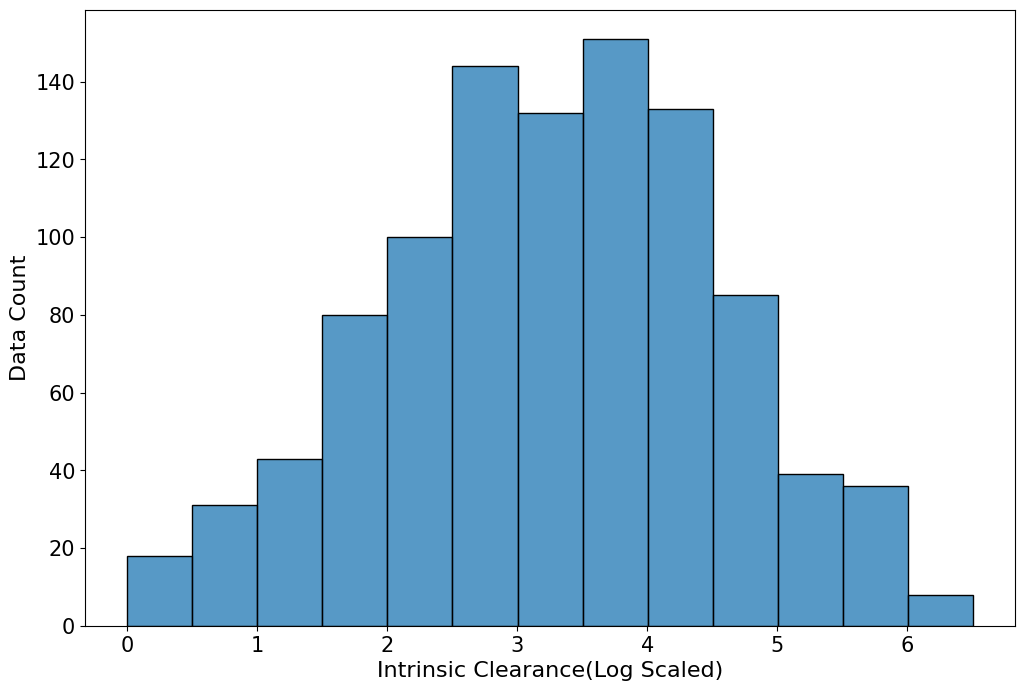

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 파일 로드
df = pd.read_csv('./dataset/fin/newdata_nonvivo_sort/train.csv')
# df = pd.read_csv('./dataset/fin/newdata_nonvivo/train.csv')

# Clint 컬럼의 데이터 스케일링

origin = len(df['Clint'])
df = df[(df['Clint'] <= 500) & (df['Fup'] >= 0.01) & (df['Fup'] <= 0.99)]
df = df[(df['logP'] >= -2.0) & (df['logP'] <= 6.0)]

df = df[(df['MW_rdkit'] < 1000.0)]
df = df[(df['HBA_rdkit'] <= 10.0)]
df = df[(df['HBD_rdkit'] <= 5.0)]

selected = len(df['Clint'])
range_ratio = selected / origin * 100

print(f"origin : {origin}, selected: {selected}")
print(f"selected ratio : {range_ratio}")
scaled_clint = np.log1p(df['Clint'])

# Scaled Clint 데이터의 분포를 0.5 간격으로 Bar plot으로 표현
plt.figure(figsize=(12, 8))
sns.histplot(scaled_clint, bins=np.arange(min(scaled_clint), max(scaled_clint) + 0.5, 0.5), kde=False)
plt.xlabel('Intrinsic Clearance(Log Scaled)', fontsize=16)
plt.ylabel('Data Count', fontsize=16)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# plt.title('Distribution of Scaled Clint Data', fontsize=18)
# 0.5보다 작은 Clint 데이터 비율 계산 및 출력
# less_than_point_five_ratio = np.sum(scaled_clint < 0.5) / len(scaled_clint) * 100
# print(f"0.5보다 작은 Clint 데이터 비율: {less_than_point_five_ratio:.2f}%")

scaled_clint_range = scaled_clint[(scaled_clint >= 2.5) & (scaled_clint <= 4.5)]
range_ratio = len(scaled_clint_range) / len(scaled_clint) * 100

print(f"2~5 사이의 Clint 데이터 비율: {range_ratio:.2f}%")

plt.savefig('scaled_clint_distribution.pdf', format="pdf")

# plt.show()

origin : 2586
2~5 사이의 Clint 데이터 비율: 3.17%


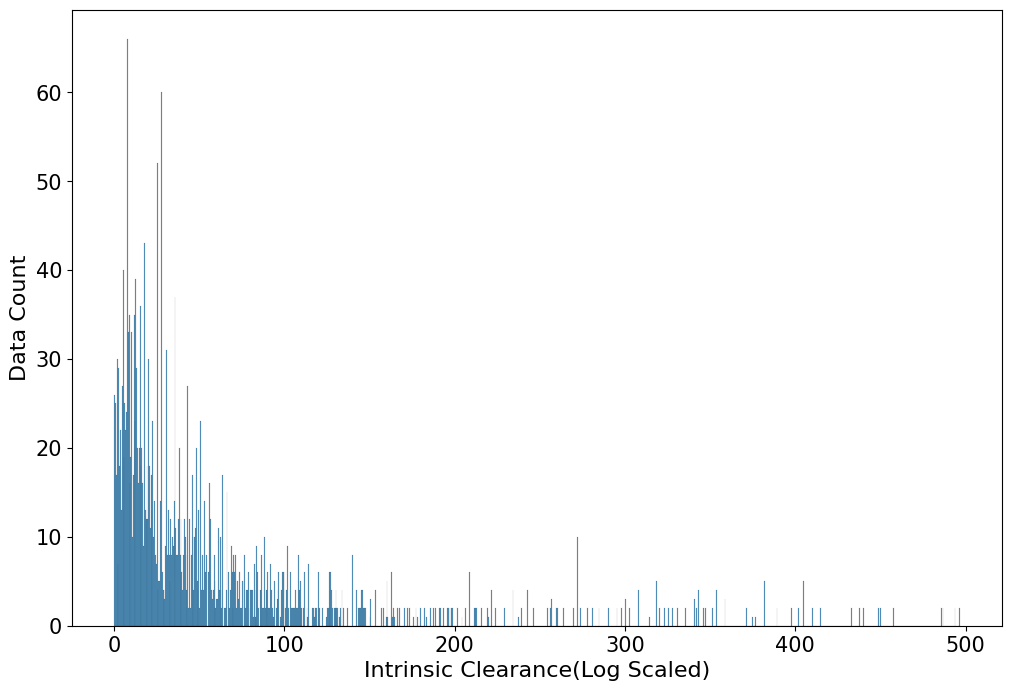

In [41]:
df = pd.read_csv('./dataset/fin/newdata_nonvivo_sort/train.csv')
df = df[(df['Clint'] <= 500)]
# origin_clint = np.log1p(df['Clint'])
origin_clint = df['Clint']


print(f"origin : {len(origin_clint)}")

plt.figure(figsize=(12, 8))
sns.histplot(origin_clint, bins=np.arange(min(origin_clint), max(origin_clint) + 0.5, 0.5), kde=False)
plt.xlabel('Intrinsic Clearance(Log Scaled)', fontsize=16)
plt.ylabel('Data Count', fontsize=16)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# plt.title('Distribution of Scaled Clint Data', fontsize=18)
# 0.5보다 작은 Clint 데이터 비율 계산 및 출력
# less_than_point_five_ratio = np.sum(scaled_clint < 0.5) / len(scaled_clint) * 100
# print(f"0.5보다 작은 Clint 데이터 비율: {less_than_point_five_ratio:.2f}%")

origin_clint_range = origin_clint[(origin_clint >= 2.5) & (origin_clint <= 4.5)]
range_ratio = len(origin_clint_range) / len(origin_clint) * 100

print(f"2~5 사이의 Clint 데이터 비율: {range_ratio:.2f}%")

plt.savefig('origin_clint_distribution.pdf', format="pdf")